In [222]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data (1).csv


In [223]:
import io

charity_df = pd.read_csv(io.BytesIO(uploaded['charity_data.csv']))
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [225]:
charity_df = charity_df.loc[charity_df['STATUS'] == 1]

In [226]:
charity_df =charity_df.drop(columns= ['NAME','EIN', 'STATUS'])

In [227]:
cat= charity_df.dtypes[charity_df.dtypes == "object"].index

In [228]:
charity_df[cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

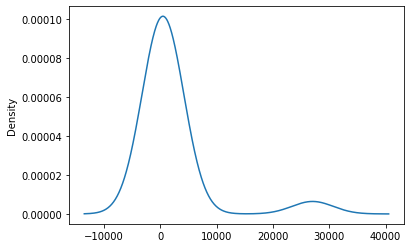

In [229]:

app_type= charity_df["APPLICATION_TYPE"].value_counts()
app_type.plot.density()

In [230]:
app_type

T3     27032
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

Bin app type

In [231]:
replace_app= list(app_type[app_type < 500].index)

#repace in DataFrame
for app in replace_app:
  charity_df["APPLICATION_TYPE"]= charity_df["APPLICATION_TYPE"].replace(app, "Other")

charity_df["APPLICATION_TYPE"].value_counts()

T3       27032
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

Bin Classification

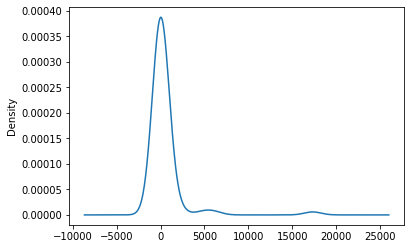

In [232]:


class_type= charity_df["CLASSIFICATION"].value_counts()

class_type.plot.density()

In [233]:
replace_class= list(class_type[class_type < 1000].index)

#repace in DataFrame
for app in replace_class:
  charity_df["CLASSIFICATION"]= charity_df["CLASSIFICATION"].replace(app, "Other")

charity_df["CLASSIFICATION"].value_counts()

charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


Standarization

In [234]:
#Create the OneHotEncoder instance

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse = False)

#fut the encoder and produce encoded DataFrame
encode_df= pd.DataFrame(enc.fit_transform(charity_df[cat].values.reshape(-1,1)))

#Rename encoded columns

encode_df.columns = enc.get_feature_names(['GROUP'])

In [235]:
charity_df =charity_df.merge(encode_df, left_index= True, right_index= True).drop(cat,1)

In [236]:
charity_df

,ASK_AMT,IS_SUCCESSFUL,GROUP_0,GROUP_1-9999,GROUP_10000-24999,GROUP_100000-499999,GROUP_10M-50M,GROUP_1M-5M,GROUP_25000-99999,GROUP_50M+,GROUP_5M-10M,GROUP_Association,GROUP_C1000,GROUP_C1200,GROUP_C2000,GROUP_C2100,GROUP_C3000,GROUP_Co-operative,GROUP_CommunityServ,GROUP_CompanySponsored,GROUP_Corporation,GROUP_Family/Parent,GROUP_Heathcare,GROUP_Independent,GROUP_N,GROUP_National,GROUP_Other,GROUP_Preservation,GROUP_ProductDev,GROUP_Regional,GROUP_T10,GROUP_T19,GROUP_T3,GROUP_T4,GROUP_T5,GROUP_T6,GROUP_T7,GROUP_T8,GROUP_Trust,GROUP_Y
0,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34297,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Split to testing and traning

In [237]:
# Split our preprocessed data into our features and target arrays
y = charity_df["IS_SUCCESSFUL"].values
x = charity_df.drop(['IS_SUCCESSFUL'],1).values

# Split 

X_train, X_test, y_train, y_test = train_test_split(x, y)

In [238]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [239]:
number_input_features = len(X_train_scaled[0])
number_input_features

39

In [240]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])

hidden_nodes_layer1= 90

nn = tf.keras.models.Sequential()

#first hidden layer

nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, input_dim= number_input_features, activation= "relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 90)                3600      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 3,691
Trainable params: 3,691
Non-trainable params: 0
_________________________________________________________________


In [241]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [242]:
# Train the model
fit_model = nn.fit(X_train_scaled ,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.7014 - accuracy: 0.5197
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6964 - accuracy: 0.5210
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6952 - accuracy: 0.5229
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5274
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5239
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6940 - accuracy: 0.5247
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5266
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.5299
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6931 - accuracy: 0.5298
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6925 - accura

In [243]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7003 - accuracy: 0.5335
Loss: 0.7003276348114014, Accuracy: 0.5334733128547668


In [244]:
tf.keras.backend.clear_session()

Optimization

In [245]:
# Define the model - deep neural net
number_input_features = len(X_train[0])

hidden_nodes_layer1= 60
hidden_nodes_layer2= 40

nn = tf.keras.models.Sequential()

#first hidden layer

nn.add(tf.keras.layers.Dense(units= hidden_nodes_layer1, input_dim= number_input_features, activation= "linear"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2400      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_2 (Dense)              (None, 15)                615       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 5,471
Trainable params: 5,471
Non-trainable params: 0
_________________________________________________________________


In [246]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [247]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.7002 - accuracy: 0.5226
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6951 - accuracy: 0.5245
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6939 - accuracy: 0.5286
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6923 - accuracy: 0.5285
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6921 - accuracy: 0.5309
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5320
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5302
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5326
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6909 - accuracy: 0.5332
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6910 - accura

In [248]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6937 - accuracy: 0.5345
Loss: 0.6937354207038879, Accuracy: 0.5345229506492615
